In [38]:
import numpy as np
import pandas as pd
from bokeh.io import curdoc, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper, Slider, CustomJS
from bokeh.palettes import Spectral6
from bokeh.layouts import widgetbox, row
from ipywidgets import interact
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import column
from bokeh.plotting import Figure, output_file, show
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import warnings
from plotly.graph_objects import Layout
import plotly.graph_objects as go
import plotly.figure_factory as ff
warnings.filterwarnings('ignore')

# 1. Descargue el conjunto de datos y formatéelo como un DataFrame de pandas.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
deportes_URL = "https://raw.githubusercontent.com/lihkirun/AppliedStatisticMS/main/DataVisualizationRPython/Lectures/Python/PythonDataSets/athlete_events.csv"

In [40]:
deportes_df = pd.read_csv(deportes_URL)

In [41]:
deportes_df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [42]:
deportes_pr= pd.read_csv(deportes_URL, usecols=['Sex','Age','Weight','Team', 'Year', 'Sport', 'Medal'])
deportes_pr.head()

Sex   Age  Weight            Team  Year          Sport Medal
0   M  24.0    80.0           China  1992     Basketball   NaN
1   M  23.0    60.0           China  2012           Judo   NaN
2   M  24.0     NaN         Denmark  1920       Football   NaN
3   M  34.0     NaN  Denmark/Sweden  1900     Tug-Of-War  Gold
4   F  21.0    82.0     Netherlands  1988  Speed Skating   NaN

# 2. Filtra el DataFrame para incluir solo las filas correspondientes a los ganadores de medallas de 2016.

In [43]:
deportes_2016 = deportes_pr.loc[deportes_pr['Year']==2016]
deportes_2016.head()

Sex   Age  Weight     Team  Year          Sport Medal
80    F  22.0   125.0  Romania  2016  Weightlifting   NaN
139   M  23.0    64.0    Spain  2016     Gymnastics   NaN
140   M  23.0    64.0    Spain  2016     Gymnastics   NaN
141   M  23.0    64.0    Spain  2016     Gymnastics   NaN
142   M  23.0    64.0    Spain  2016     Gymnastics   NaN

In [44]:
deportes_2016=deportes_2016.dropna()
deportes_2016.head()

Sex   Age  Weight        Team  Year       Sport   Medal
158   M  21.0    90.0       Italy  2016      Rowing  Bronze
161   F  21.0    49.0  Azerbaijan  2016   Taekwondo  Bronze
175   M  31.0    86.0      France  2016    Handball  Silver
450   M  26.0    80.0        Iran  2016   Wrestling  Bronze
794   M  24.0    62.0      Russia  2016  Gymnastics  Silver

# 3. Descubre las medallas concedidas en 2016 en cada deporte.

In [45]:
deportes_2016.groupby('Sport', as_index=False).count().sort_values(by='Medal', ascending=False)

Sport  Sex  Age  Weight  Team  Year  Medal
23               Swimming  190  190     190   190   190    190
1               Athletics  189  189     189   189   189    189
19                 Rowing  144  144     144   144   144    144
11               Football  105  105     105   105   105    105
15                 Hockey   99   99      99    99    99     99
14               Handball   89   89      89    89    89     89
7                 Cycling   84   84      84    84    84     84
6                Canoeing   82   82      82    82    82     82
31             Water Polo   78   78      78    78    78     78
20           Rugby Sevens   74   74      74    74    74     74
33              Wrestling   72   72      72    72    72     72
30             Volleyball   72   72      72    72    72     72
3              Basketball   72   72      72    72    72     72
13             Gymnastics   66   66      66    66    66     66
10                Fencing   65   65      65    65    65     65
16                   Judo   56   56      56    56    56     56
5                  Boxing   51   51      51    51    51     51
9           Equestrianism   45   45      45    45    45     45
21                Sailing   45   45      45    45    45     45
22               Shooting   45   45      45    45    45     45
32          Weightlifting   45   45      45    45    45     45
8                  Diving   36   36      36    36    36     36
26              Taekwondo   32   32      32    32    32     32
24  Synchronized Swimming   32   32      32    32    32     32
27                 Tennis   24   24      24    24    24     24
0                 Archery   24   24      24    24    24     24
25           Table Tennis   24   24      24    24    24     24
2               Badminton   23   23      23    23    23     23
18    Rhythmic Gymnastics   18   18      18    18    18     18
4        Beach Volleyball   12   12      12    12    12     12
28           Trampolining    6    6       6     6     6      6
29              Triathlon    6    6       6     6     6      6
17      Modern Pentathlon    6    6       6     6     6      6
12                   Golf    4    4       4     4     4      4

# 4. Enumera los cinco deportes más importantes en función del mayor número de medallas concedidas. Filtra el DataFrame una vez más para incluir solo los registros de los cinco deportes principales en 2016.

In [46]:
deportes_2016_pr=pd.crosstab(index =  deportes_2016['Sport'], columns =  deportes_2016['Medal'])
deportes_2016_pr['total_medal']=deportes_2016_pr['Bronze']+deportes_2016_pr['Gold']+deportes_2016_pr['Silver']
deportes_2016_pr.nlargest(5,'total_medal')

Medal      Bronze  Gold  Silver  total_medal
Sport                                       
Swimming       57    70      63          190
Athletics      62    65      62          189
Rowing         48    48      48          144
Football       35    35      35          105
Hockey         33    34      32           99

Mediante la tabla podemos resaltar que el deporte con mas medallas de oro (57), plata (70) y bronce (63) es la natación para un total de 190; el de menos medalleria de los cinco deportes fue el hockey con un total de 99 medallas.

Los deportes de Football y Rowing obtuvieron el mismo numero de medallas de oro, plata y bronce.

In [70]:
dp_2016=deportes_2016[deportes_2016.Sport.isin(['Swimming', 'Athletics', 'Rowing', 'Football', 'Hockey'])]
dp_2016.head()

Sex   Age  Weight           Team  Year      Sport   Medal
158    M  21.0    90.0          Italy  2016     Rowing  Bronze
814    M  30.0    92.0      Australia  2016   Swimming  Bronze
1228   F  31.0    72.0    Netherlands  2016     Rowing  Silver
1529   F  31.0   120.0    New Zealand  2016  Athletics  Silver
1847   M  27.0   100.0  United States  2016   Swimming  Bronze

# 5. Genere un gráfico de barras con los recuentos de registros correspondientes a cada uno de los cinco deportes principales.

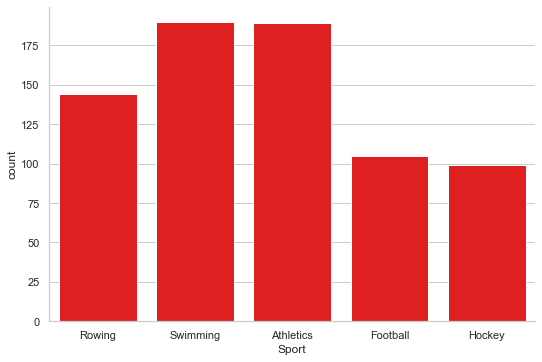

In [71]:
sns.catplot("Sport", data = dp_2016, aspect = 1.5, kind = "count", color = "red")

Mediante el diagrama de barras nos damos cuenta que el mayor número de medallas lo obtuvo la natación y el de manor medalleria el deporte de hockey.

El atletismo se ubica como el segundo deporte con más medallas en el año 2016.

In [72]:
warnings.filterwarnings('ignore')

# 6. Generar un histograma para la característica Edad de todos los ganadores de medallas en los cinco deportes principales (2016).

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

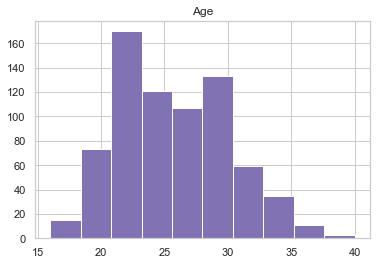

In [73]:
dp_2016.hist(column="Age", color = "m")

Los histogramas son importantes para nuestro dataframe ya que tiene varias categorías con sus respectivas frecuencias: sexo, edad, peso, equipo, deporte, medalla, entre otros.
A nuestro dataframe dp_2016, que contiene el filtro de los 5 deportes principales en el año 2016, le aplicaremos la función hist, colocando en el eje y la frecuencia y en el eje x la variable, en este caso edad que es de tipo discreta, arrojando un histograma con relación a la columna "Age".

Dentro de la función hist, podemos usar el parámetro bins, que permite realizar más clases en los datos categóricos de tipo contínuo, pero dado que en nuestro caso nuestra variable "Age" es discreta, no tiene aplicabilidad realizarlo.

Mediante el gráfico observamos que aproximadamente la edad que mas se presenta entrelos deportistas de las cinco mejores disciplinas es la comprendida entre el rango de 21 a 22 años.

En estos deportes que se necesita de excelente condición física las edades que menos se presentan son las de 34 años en adelante.

<AxesSubplot:xlabel='Age', ylabel='Density'>

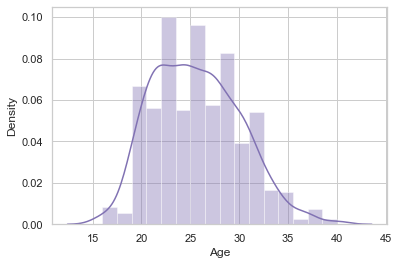

In [74]:
sns.distplot(dp_2016.Age, color = "m")

Con las librerías "seaborn y pandas" podemos hacer que nuestro histograma muestre una línea de tendencia, dado que la libería seaborn tiene funciones gráficas, particularmente la función "distplot", basicamente dibuja una línea de distribución para esa probabilidad, la línea suavizada es corresponde a la densidad de Kernell.

Para nuestro caso en particular, hay una tendencia a una distribución normal

<AxesSubplot:xlabel='Age', ylabel='Density'>

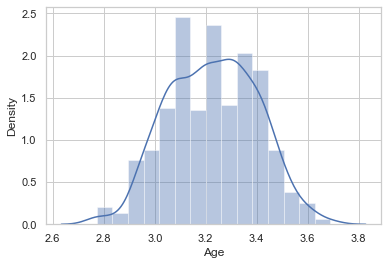

In [75]:
sns.distplot(np.log(dp_2016.Age))

Con la librería numpy y seaborn pordemos obtener una transformación logarítmica para identificar más tendencias.
De seaborn, podemos utilizar la función distplot, y de la librería numpy, utilizaremos la función lg, para tener una escala diferente y buscar normalidad.

En este caso no encontramos normalidad, pero encontramos que la mayor concentración de edades está entre 31 y 34 años en los deportistas.

# 7.Genera un gráfico de barras que indique cuántas medallas ganó el equipo de cada país en los cinco deportes principales en 2016.

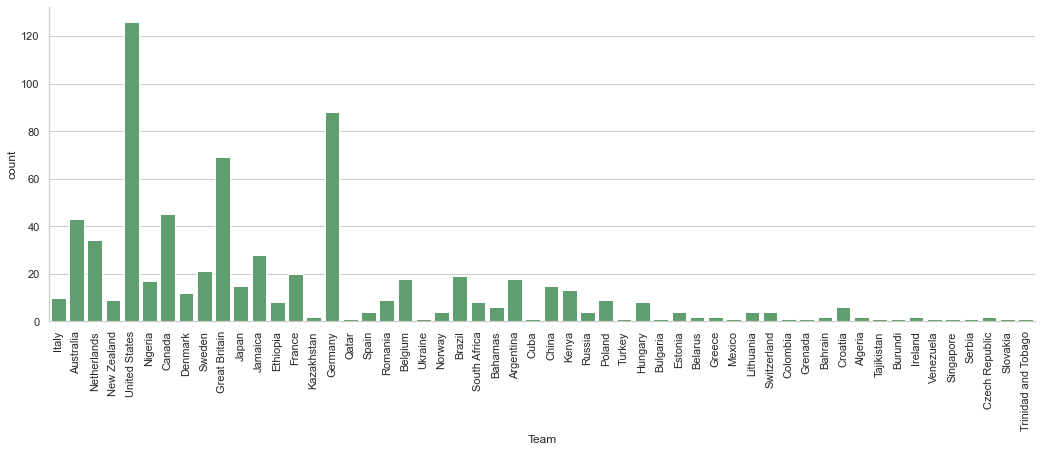

In [76]:
ax=sns.catplot("Team", data = dp_2016, aspect = 3, kind = "count", color = "g")
ax.set_xticklabels(rotation=90)

En este diagrama de barras visualizamos la categoróia "Team" en el eje x, y la frecuencia en el eje y, para ello usamos en el parámetro kind el tipo count, para que realice el conteo de la variable "Team" que corresponde a los países, el parámetro aspect considera la visualización del gráfico, y el data corresponde al dataframe que reúne a los equipos y el número de medallas que obtuvieron en los 5 deportes principales (swimming,) en el año 2016.

En el diagrama de barras podemos realizar el ranking de los equipos con mayor número de medallas obtenidas para el año 2016:
1. Estados Unidos
2. Alemania
3. Gran Bretaña
4. Canadá
5. Australia

# 8. Genere un gráfico de barras que indique el peso medio de los jugadores, clasificados en función del género, que ganaron en los cinco principales deportes en 2016.

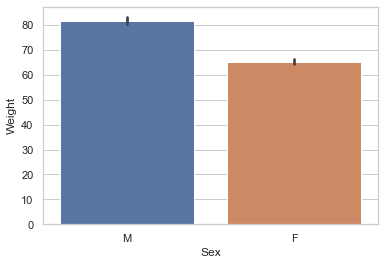

In [77]:
sns.set(style = "whitegrid")
ax = sns.barplot(x = "Sex", y = "Weight", data = dp_2016, estimator = np.mean)

Al analizar la categoría "sexo" que se considera una subcategoria

# 1.2

# 1. Descargue el conjunto de datos y formatéelo como un pandas DataFrame

In [87]:
deportes_URL = "https://raw.githubusercontent.com/lihkirun/AppliedStatisticMS/main/DataVisualizationRPython/Lectures/Python/PythonDataSets/athlete_events.csv"

In [88]:
deportes_df = pd.read_csv(deportes_URL)

# Filtrar el DataFrame para incluir únicamente las filas correspondientes a los ganadores de medallas de 2016 en los deportes mencionados en la descripción de la actividad

In [89]:
dp_2016 = deportes_df.loc[deportes_df['Year'] == 2016]
dp_2016.head()
dp_2016gan=dp_2016.dropna()
dp_sports=dp_2016gan[dp_2016gan.Sport.isin(['Athletics', 'Swimming','Rowing','Football','Hockey'])]
dp_sports.head()

ID                                  Name Sex   Age  Height  Weight  \
158     62                     Giovanni Abagnale   M  21.0   198.0    90.0   
814    465                  Matthew "Matt" Abood   M  30.0   197.0    92.0   
1228   690                    Chantal Achterberg   F  31.0   172.0    72.0   
1529   846  Valerie Kasanita Adams-Vili (-Price)   F  31.0   193.0   120.0   
1847  1017                Nathan Ghar-Jun Adrian   M  27.0   198.0   100.0   

               Team  NOC        Games  Year  Season            City  \
158           Italy  ITA  2016 Summer  2016  Summer  Rio de Janeiro   
814       Australia  AUS  2016 Summer  2016  Summer  Rio de Janeiro   
1228    Netherlands  NED  2016 Summer  2016  Summer  Rio de Janeiro   
1529    New Zealand  NZL  2016 Summer  2016  Summer  Rio de Janeiro   
1847  United States  USA  2016 Summer  2016  Summer  Rio de Janeiro   

          Sport                                          Event   Medal  
158      Rowing                     Rowing Men's Coxless Pairs  Bronze  
814    Swimming  Swimming Men's 4 x 100 metres Freestyle Relay  Bronze  
1228     Rowing                Rowing Women's Quadruple Sculls  Silver  
1529  Athletics                     Athletics Women's Shot Put  Silver  
1847   Swimming             Swimming Men's 50 metres Freestyle  Bronze

# 2. Observe las características del conjunto de datos y anote su tipo de datos: ¿son categóricos o numéricos?

In [90]:
dp_sports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 158 to 271019
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      726 non-null    int64  
 1   Name    726 non-null    object 
 2   Sex     726 non-null    object 
 3   Age     726 non-null    float64
 4   Height  726 non-null    float64
 5   Weight  726 non-null    float64
 6   Team    726 non-null    object 
 7   NOC     726 non-null    object 
 8   Games   726 non-null    object 
 9   Year    726 non-null    int64  
 10  Season  726 non-null    object 
 11  City    726 non-null    object 
 12  Sport   726 non-null    object 
 13  Event   726 non-null    object 
 14  Medal   726 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 90.8+ KB


Se establece que hay 10 variables categoricas las cuales son:'Name','Sex','NOC','Games','Team','Season','City','Sport','Event'y 'Medal'
Y 4 variables numericas: una enteras(int64)'Year'; y 3 variables decimales(float64)'Age','Height'y'Weight'

In [91]:
dp_sports.describe()

ID         Age      Height      Weight    Year
count     726.000000  726.000000  726.000000  726.000000   726.0
mean    68714.092287   25.615702  180.038567   73.731405  2016.0
std     39353.463746    4.445809   10.091370   14.285977     0.0
min        62.000000   16.000000  150.000000   40.000000  2016.0
25%     32610.250000   22.000000  173.000000   64.000000  2016.0
50%     73187.000000   25.000000  180.000000   72.000000  2016.0
75%    103225.000000   29.000000  187.000000   82.000000  2016.0
max    135525.000000   40.000000  207.000000  136.000000  2016.0

Se determina que los atletas que obtuvieron medallas en el 2016 tiene una edad promedio de más de 25 años, una altura promedio de mas 178 cms y un peso promedio de 73.23Kg

# 3. Evaluar cuál sería la visualización adecuada para que un patrón global represente las características de height y weight

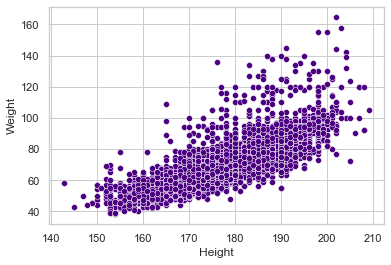

In [92]:
ax = sns.scatterplot(x="Height", y="Weight", data=dp_sport,color='Indigo')

Se puede visualizar una correlacion lineal positiva  entre las variables Altura(Height) y el peso(Weight) de los atletas ganadores de medallas en el año 2016

# 4. Evaluar cuál sería la visualización adecuada para representar las estadísticas resumidas de las características de height y weight en función de las medallas, separadas además por género de los atletas.

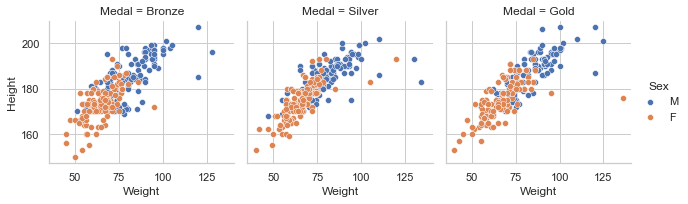

In [93]:
grid = sns.FacetGrid(dp_sport, col = "Medal", hue = "Sex")
grid.map(sns.scatterplot, "Weight", "Height")
grid.add_legend()
plt.show()

Para la grafica de características de height y weight en función de las medallas, separadas además por género de los atletas, se utiliza un scatterplot, en el cual se puede observar que los hombres(M) presentan una mayor talla y peso que las mujeres(F),y por medalleria se ve que el Bronze muestra una mayor concentracion de los atletas femeninos de 60 a 80 kg y una talla entre 170 a 180 cms

# 1.3

# 1. Vuelve a crear el DataFrame de las emisiones de dióxido de carbono y del PIB.

In [84]:
gm_url='https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/gapminder.csv'
co2_url='https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/co2.csv'

In [85]:
gm=pd.read_csv(gm_url)
co2=pd.read_csv(co2_url)
df_gm = gm[['Country', 'region']].drop_duplicates()
df_w_regions = pd.merge(co2, df_gm, left_on='country', right_on='Country', how='inner')
df_w_regions = df_w_regions.drop('Country', axis='columns')
new_co2 = pd.melt(df_w_regions, id_vars=['country', 'region'])
columns = ['country', 'region', 'year', 'co2']
new_co2.columns = columns

df_co2 = new_co2[new_co2['year'].astype('int64') > 1963]
df_co2 = df_co2.sort_values(by=['country', 'year'])
df_co2['year'] = df_co2['year'].astype('int64')
df_gdp = gm[['Country', 'Year', 'gdp']]
df_gdp.columns = ['country', 'year', 'gdp']
data = pd.merge(df_co2, df_gdp, on=['country', 'year'], how='left')
data = data.dropna()
data.head()

country      region  year     co2     gdp
0  Afghanistan  South Asia  1964  0.0863  1182.0
1  Afghanistan  South Asia  1965  0.1010  1182.0
2  Afghanistan  South Asia  1966  0.1080  1168.0
3  Afghanistan  South Asia  1967  0.1240  1173.0
4  Afghanistan  South Asia  1968  0.1160  1187.0

# 2. Crea un gráfico de dispersión con los ejes x e y como year y co2 respectivamente. Añada un para los valores de co2 con el parámetro marginaly_y.

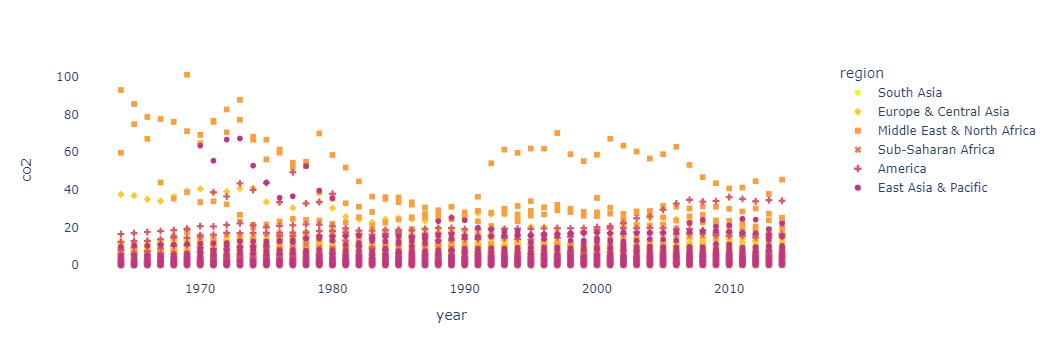

In [86]:
fig = px.scatter(df_co2, x="year", y="co2", color="region", symbol="region",color_discrete_sequence= px.colors.sequential.Plasma_r,)
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

# 3. Crea un gráfico de caja para los valores del PIB con el parámetro marginal_x. Añada los parámetros de parámetros de animación en la columna del año

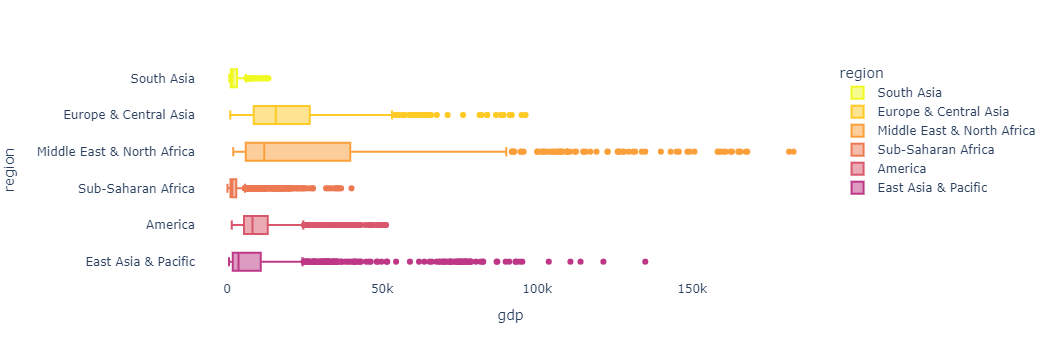

In [59]:
fig = px.box(data, x="gdp", y="region",color="region",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,)
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()

# 4. Crea un gráfico de dispersión con los ejes x e y como gdp y co2 respectivamente.

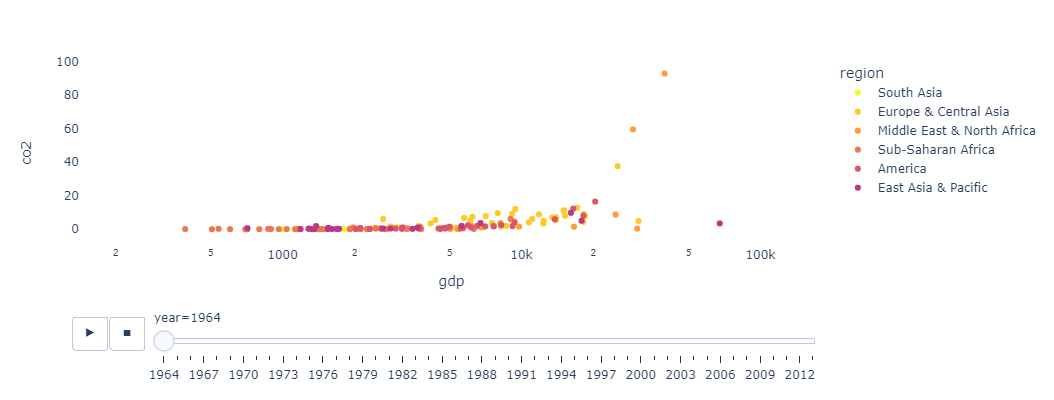

In [60]:
xmin, xmax = min(data.gdp), max(data.gdp)
ymin, ymax = min(data.co2), max(data.co2)
fig = px.scatter(data, 
                 x="gdp", y="co2", 
                 animation_frame="year",
                 animation_group="country", 
                 color="region", 
                 width=1200, height=400, 
                 log_x=True, 
                 size_max=45,
                 range_x=[xmin,xmax],
                 range_y=[-10,ymax],
                color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

# 5. Cree un contorno de densidad con los ejes x e y como pib y co2 respectivamente

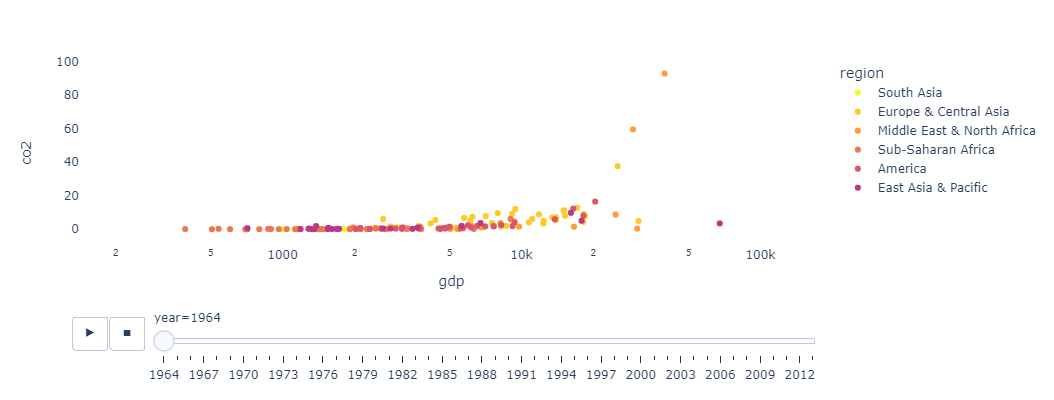

In [62]:
xmin, xmax = min(data.gdp), max(data.gdp)
ymin, ymax = min(data.co2), max(data.co2)
fig = px.scatter(data, 
                 x="gdp", y="co2", 
                 animation_frame="year",
                 animation_group="country", 
                 color="region", 
                 width=1200, height=400, 
                 log_x=True, 
                 size_max=45,
                 range_x=[xmin,xmax],
                 range_y=[-10,ymax],
                color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

# 1.4

# 1. Descargue el conjunto de datos googleplaystore.csv y formatéelo como un pandas DataFrame

In [63]:
google_url='https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/googleplaystore.csv'

In [64]:
df = pd.read_csv(google_url)
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

# 2. Elimina las entradas del DataFrame que tienen valores de característica de NA.

In [65]:
df.dropna(inplace=True)
df.shape

(9360, 13)

# 3. Cree el gráfico de barras necesario del número de aplicaciones en cada categoría Content Rating

In [66]:
graph=df.sample(n=5000, random_state=1)
alt.Chart(graph).mark_bar().encode(
    x = 'Content Rating:N',
    y = 'count():Q'
).properties(width=350)

alt.Chart(...)

El gráfico de barras en el eje x nos muestra la clasificación de contenido (Adultos mayores de 18 años, todo público, mayores de 10 años, mayores de 17 años, adolescentes y sin clasificar) y en el eje y nos da la cantidad de registros.

Mediante el gráfico podemos concluir que la mayoria de las aplicaciones son hechas para todo público y las que tienen menos representacón son las hechas para adultos mayores de 18 años y sin clasificar.

# 4. Cree el mapa de calor necesario indicando el número de aplicaciones en la app en rangos Category y Rating

In [67]:
alt.Chart(graph).mark_rect().encode(
    alt.X('Category', bin = False),
    alt.Y('Rating', bin = True),
    alt.Color('count()', scale=alt.Scale(scheme='greenblue'), legend=alt.Legend(title='App'))
).properties(width=350)

alt.Chart(...)

El mapa de calor nos permite concluir que las apps (aplicaciones) de familia tienen mejor rating seguido por las apps de juego.

# 5. Combine el código del gráfico de barras y del mapa de calor y cree una visualización con ambos gráficos vinculados dinámicamente entre sí.

In [68]:
bars = alt.Chart(graph).mark_bar().encode(
    x = 'Content Rating:N',
    y = 'count():Q'
).properties(width=350)

heatmap = alt.Chart(graph).mark_rect().encode(
    alt.X('Category', bin = False),
    alt.Y('Rating', bin = True),
    alt.Color('count()', scale=alt.Scale(scheme='greenblue'), legend=alt.Legend(title='App'))
).properties(width=350)

circles = heatmap.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('count()', legend = alt.Legend(title='App'))
)

heatmap + circles | bars

alt.HConcatChart(...)

# Interprete cada visualización

El grafico de barras para Content Rating nos permite concluir que la mayoria de aplicaciones son hechas para todo publico. El mapa de calor indica que las apps de familia tiene mejor que rating que las demas apps.